<div><font face="Times New Roman" size=7><br><br>
<center>
Linear Regression and Regularization
<center><br></div>
 

### Machine Learning for Bioinformatics: Homework 1 (Practical)
*Refer to (preferably)Quera or Amir Soleimanifar for any questions you have or other inconveniences*  
*Telegram ID: @amirsoleix*  
*Email: asoleix@gmail.com*

## Overview
<font face="Arial" size=4><br>
We want to train a model which estimates obesity levels based on eating habits and physical conditions of an individual. For our purpose, we will use a dataset of individuals from the countries of Mexico, Peru and Columbia.  
The dataset was collected by Fabio Mendoza Palechor and ALexis de la Hoz Manotas.

## Description 
<font face="Arial" size=4><br>
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

## Practical Phase 
<font face="Arial" size=4><br>
You need to complete each section by writing the relevant code, running and assessing the results. Feel free to add new code or markdown cells. After all snippets have been completed, save the results and upload the Jupyter notebook.

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Read the dataset
df = pd.read_csv('./dataset_bmi.csv')
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,18.9
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,22.7
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,21.6
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,28.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,26.6


## Split the Data  
<font face="Arial" size=4><br>
Split the data to training (80 percent) and test (20 percent) sets using Stratified Sampling on `BMI` column.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split


bins = [0, 18.5, 25, 30, 35, 40, 100]
labels = ['underweight', 'normal weight', 'overweight', 'obese class I', 'obese class II', 'obese class III']
df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

X_train, X_test, y_train, y_test = train_test_split(df.drop('BMI', axis=1), df['BMI'], test_size=0.2, stratify=df['BMI_category'], random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")



Training set shape: (1688, 17), (1688,)
Test set shape: (423, 17), (423,)


## Exploratory Data Analysis  
<font face="Arial" size=4><br>
Analyze the data and find information about different attributes. Requested items are:
1. Number of categories and distribution of them in either plots or numbers
2. Mean, std, and quartiles of numerical attributes
3. Check for existence of NaN or empty rows  

Visualize the dataset in convenient way and measure the correlation between different columns of the matrix using `corr()` command.

Number of categories: 6
Distribution of categories:
overweight         582
obese class I      367
obese class II     313
obese class III    299
normal weight      282
underweight        268
Name: BMI_category, dtype: int64


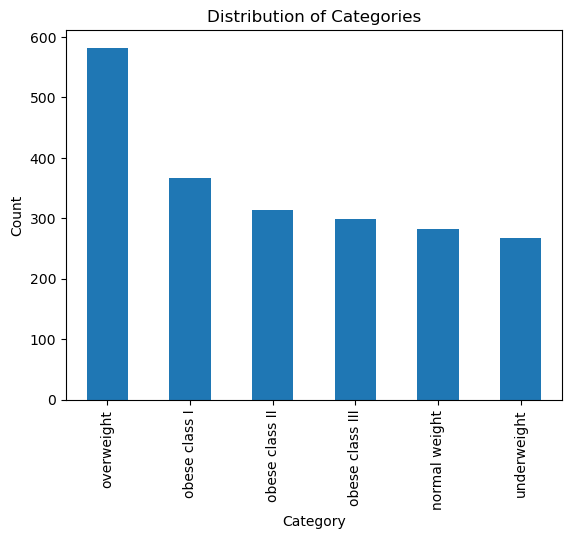

In [4]:
category_counts = df['BMI_category'].value_counts()

print(f"Number of categories: {len(category_counts)}")
print(f"Distribution of categories:\n{category_counts}")

category_counts.plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   object  
 1   Age                             2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   object  
 5   FAVC                            2111 non-null   object  
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   CAEC                            2111 non-null   object  
 9   SMOKE                           2111 non-null   object  
 10  CH2O                            2111 non-null   float64 
 11  SCC                             2111 non-null   object  
 12  FAF                 

In [6]:
df.describe()
#for get just one of them we can use this code:
#df.describe().loc['min or age or std or .....']


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.902132
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.460415
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.800000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.550000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,29.300000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.600000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,48.500000


In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
means = df[num_cols].mean()
stds = df[num_cols].std()
quartiles = df[num_cols].quantile([0.25, 0.5, 0.75])
print("Means:")
print(means)
print("\nStandard deviations:")
print(stds)
print("\nQuartiles:")
print(quartiles)


Means:
Age       24.312600
Height     1.701677
Weight    86.586058
FCVC       2.419043
NCP        2.685628
CH2O       2.008011
FAF        1.010298
TUE        0.657866
BMI       29.902132
dtype: float64

Standard deviations:
Age        6.345968
Height     0.093305
Weight    26.191172
FCVC       0.533927
NCP        0.778039
CH2O       0.612953
FAF        0.850592
TUE        0.608927
BMI        8.460415
dtype: float64

Quartiles:
            Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
0.25  19.947192  1.630000   65.473343  2.000000  2.658738  1.584812  0.124505   
0.50  22.777890  1.700499   83.000000  2.385502  3.000000  2.000000  1.000000   
0.75  26.000000  1.768464  107.430682  3.000000  3.000000  2.477420  1.666678   

          TUE    BMI  
0.25  0.00000  24.55  
0.50  0.62535  29.30  
0.75  1.00000  36.60  


In [8]:
null_columns = df.isnull().any()
if null_columns.any():
    print(f"The following columns have null values: {null_columns[null_columns].index.tolist()}")
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


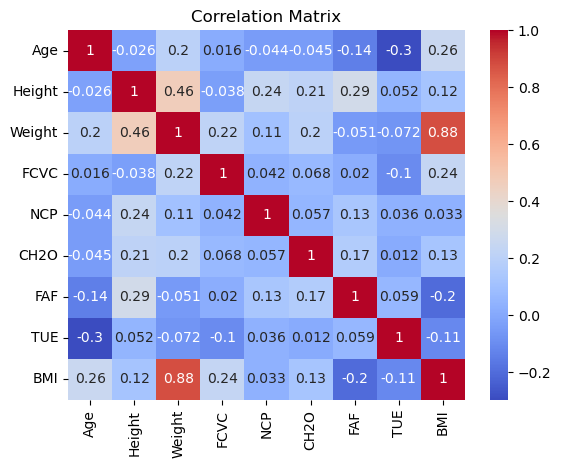

In [9]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Data Cleaning and Manipulation  
<font face="Arial" size=4><br>
Transform all categorical attributes to numerical attributes using ordinal encoders if the attribute is ordinal or one-hot encoders if the attribute is nominal.   

Add at least two attributes to the dataset using information of other columns. Explain the reasons you think the added columns are better indicators of the data.  
Scale the data and build a pipeline to be used later for test set.

In [10]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


ordinal_encoder = OrdinalEncoder()

X_train["Gender"] = ordinal_encoder.fit_transform(X_train[["Gender"]])
X_train["family_history_with_overweight"] = ordinal_encoder.fit_transform(X_train[["family_history_with_overweight"]])
X_train["FAVC"] = ordinal_encoder.fit_transform(X_train[["FAVC"]])
X_train["CAEC"] = ordinal_encoder.fit_transform(X_train[["CAEC"]])
X_train["SMOKE"] = ordinal_encoder.fit_transform(X_train[["SMOKE"]])
X_train["SCC"] = ordinal_encoder.fit_transform(X_train[["SCC"]])
X_train["CALC"] = ordinal_encoder.fit_transform(X_train[["CALC"]])
X_train["MTRANS"] = ordinal_encoder.fit_transform(X_train[["MTRANS"]])
X_train["BMI_category"] = ordinal_encoder.fit_transform(X_train[["BMI_category"]])

# Transforming categorical attributes to numerical attributes using one-hot encoders
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

encoded_features = onehot_encoder.fit_transform(X_train).toarray()

for i, category in enumerate(onehot_encoder.categories_[0]):
    X_train[category] = encoded_features[:, i]

X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI_category,0.0,1.0
437,0.0,18.000000,1.600000,56.000000,1.0,1.0,2.000000,1.000000,0.0,0.0,2.000000,0.0,1.000000,0.000000,2.0,4.0,0.0,1.0,0.0
765,0.0,30.958957,1.633491,68.803694,1.0,1.0,2.052152,3.000000,2.0,0.0,1.972074,0.0,0.228307,0.000000,2.0,0.0,4.0,1.0,0.0
945,1.0,23.455324,1.702516,75.000000,1.0,1.0,2.162519,3.000000,2.0,0.0,2.152666,0.0,1.078074,1.502839,2.0,3.0,4.0,0.0,1.0
1561,1.0,31.194458,1.726279,110.714711,1.0,1.0,1.794825,3.914454,2.0,0.0,1.972016,0.0,0.668963,0.000000,3.0,0.0,2.0,0.0,1.0
1352,0.0,38.098745,1.598448,80.000000,1.0,1.0,2.020785,1.169173,2.0,0.0,1.972551,0.0,1.903338,0.000000,2.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.0,39.214514,1.580765,62.631382,1.0,1.0,2.487167,3.000000,2.0,0.0,2.396977,0.0,0.577063,0.435072,2.0,0.0,4.0,1.0,0.0
847,0.0,21.000000,1.752944,77.965532,1.0,1.0,2.839048,2.106010,2.0,0.0,1.639202,0.0,1.117311,0.967919,2.0,3.0,4.0,1.0,0.0
310,1.0,17.000000,1.790000,57.000000,1.0,1.0,2.000000,4.000000,1.0,0.0,2.000000,0.0,2.000000,1.000000,3.0,3.0,5.0,0.0,1.0
993,0.0,20.634694,1.568188,67.904023,1.0,0.0,2.512719,3.000000,2.0,0.0,1.131169,0.0,0.095389,1.000000,3.0,3.0,4.0,1.0,0.0


<h4>Total_calories :</h4> We can create a new attribute called Total_calories that is the sum of the calories consumed from different food items (calories from breakfast, lunch, dinner, snacks). This attribute can provide a better indication of a person's eating habits and may help in predicting their obesity level.



<h4>Physical Activity Level :</h4>

The amount of physical activity an individual engages in can also be a good indicator of obesity. We can estimate the physical activity level by calculating the ratio of the frequency of physical activity to the amount of sedentary time. This can be represented by a new attribute called 'PAL' (Physical Activity Level).

In [11]:
X_train['Total_calories'] = X_train['FAVC'] + X_train['FCVC'] + X_train['NCP'] * 3 + X_train['CH2O'] * 2 + X_train['SCC'] * 2 + X_train['FAF'] * 2.5
# Calculate Physical Activity Level
X_train['Physical Activity Level'] = (X_train['FAF']+1) / (X_train['TUE']+1)
X_train


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,BMI_category,0.0,1.0,Total_calories,Physical Activity Level
437,0.0,18.000000,1.600000,56.000000,1.0,1.0,2.000000,1.000000,0.0,0.0,...,0.0,1.000000,0.000000,2.0,4.0,0.0,1.0,0.0,12.500000,2.000000
765,0.0,30.958957,1.633491,68.803694,1.0,1.0,2.052152,3.000000,2.0,0.0,...,0.0,0.228307,0.000000,2.0,0.0,4.0,1.0,0.0,16.567068,1.228307
945,1.0,23.455324,1.702516,75.000000,1.0,1.0,2.162519,3.000000,2.0,0.0,...,0.0,1.078074,1.502839,2.0,3.0,4.0,0.0,1.0,19.163036,0.830287
1561,1.0,31.194458,1.726279,110.714711,1.0,1.0,1.794825,3.914454,2.0,0.0,...,0.0,0.668963,0.000000,3.0,0.0,2.0,0.0,1.0,20.154626,1.668963
1352,0.0,38.098745,1.598448,80.000000,1.0,1.0,2.020785,1.169173,2.0,0.0,...,0.0,1.903338,0.000000,2.0,0.0,1.0,1.0,0.0,15.231751,2.903338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.0,39.214514,1.580765,62.631382,1.0,1.0,2.487167,3.000000,2.0,0.0,...,0.0,0.577063,0.435072,2.0,0.0,4.0,1.0,0.0,18.723778,1.098943
847,0.0,21.000000,1.752944,77.965532,1.0,1.0,2.839048,2.106010,2.0,0.0,...,0.0,1.117311,0.967919,2.0,3.0,4.0,1.0,0.0,16.228759,1.075914
310,1.0,17.000000,1.790000,57.000000,1.0,1.0,2.000000,4.000000,1.0,0.0,...,0.0,2.000000,1.000000,3.0,3.0,5.0,0.0,1.0,24.000000,1.500000
993,0.0,20.634694,1.568188,67.904023,1.0,0.0,2.512719,3.000000,2.0,0.0,...,0.0,0.095389,1.000000,3.0,3.0,4.0,1.0,0.0,14.013530,0.547694


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[-1.00713445, -1.01093117, -1.07886646, ..., -1.00713445,
        -1.4274378 ,  0.8450712 ],
       [-1.00713445,  1.09654396, -0.72078384, ..., -1.00713445,
        -0.36837708, -0.17192317],
       [ 0.99291609, -0.12374869,  0.01722495, ...,  0.99291609,
         0.30761078, -0.69646387],
       ...,
       [ 0.99291609, -1.17355808,  0.95259563, ...,  0.99291609,
         1.56715185,  0.18613405],
       [-1.00713445, -0.58245903, -1.41899736, ..., -1.00713445,
        -1.03331608, -1.0688849 ],
       [ 0.99291609, -0.84830426,  1.05951469, ...,  0.99291609,
         0.52555545,  2.16294551]])

### Principal Component Analysis  
<font face="Arial" size=4><br>
Use `sklearn.decomposition.PCA` to reduce the dimension of dataset to a convenient number. Plot the scree plot for the final solution.

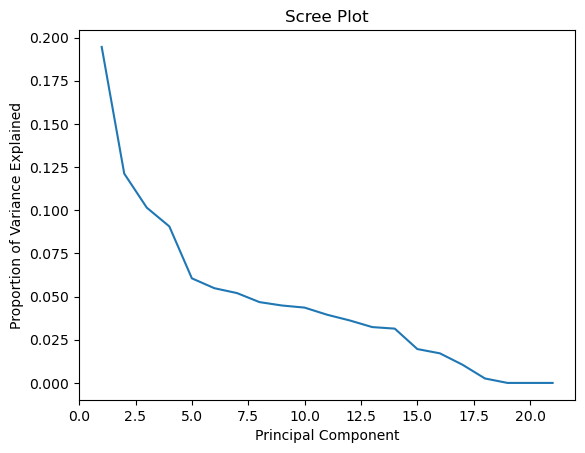

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()


## Model Training  
<font face="Arial" size=4><br>
Train the <code>linear regression</code> model and its regularized forms (<code>ridge</code> and <code>lasso</code>) on your training data. Cross-validate the models using <code>10 fold CV</code> and report the accuracy scores. You are allowed to use <code>sklearn.linear_model</code> for your implementation.

### Linear Regression

In [14]:
from sklearn.model_selection import cross_val_score, train_test_split , KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


lin_reg_model = LinearRegression()
lin_reg_model=lin_reg_model.fit(X_train,y_train)
lin_reg_scores = cross_val_score(lin_reg_model, X_train, y_train, cv=KFold(n_splits=10, shuffle=True))
print("Linear Regression Scores:", np.mean(lin_reg_scores))
print("Linear Regression Accuracy Scores: ", lin_reg_scores)
print("Mean Accuracy Score: ", np.mean(lin_reg_scores))




Linear Regression Scores: 0.8934095038530725
Linear Regression Accuracy Scores:  [0.91280908 0.89077415 0.88528973 0.88575224 0.87075263 0.87950906
 0.8943792  0.89378211 0.90082211 0.92022472]
Mean Accuracy Score:  0.8934095038530725


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. A

### Ridge Regression

In [15]:
ridge = Ridge(alpha=1.0)
ridge=ridge.fit(X_train,y_train)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
print("Ridge Regression Accuracy Scores: ", ridge_scores)
print("Mean Accuracy Score: ", np.mean(ridge_scores))

Ridge Regression Accuracy Scores:  [0.91883031 0.86768551 0.9027007  0.87819072 0.89548868 0.8930383
 0.88243099 0.89274756 0.88080468 0.90398774]
Mean Accuracy Score:  0.8915905203726636


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. A

### Lasso Regression

In [16]:
lasso = Lasso(alpha=1.0)
lasso=lasso.fit(X_train,y_train)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
print("Lasso Regression Accuracy Scores: ", lasso_scores)
print("Mean Accuracy Score: ", np.mean(lasso_scores))

Lasso Regression Accuracy Scores:  [0.8177474  0.76488768 0.81959747 0.7879062  0.8017068  0.79613317
 0.79692293 0.82179881 0.77112326 0.82097766]
Mean Accuracy Score:  0.7998801384802544


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. A

## Final Report  
<font face="Arial" size=4><br>
After training the data, use your pipeline previously created to transform the test data to decent form and then run your final model and report the accuracy score.

In [17]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


ordinal_encoder = OrdinalEncoder()

X_test["Gender"] = ordinal_encoder.fit_transform(X_test[["Gender"]])
X_test["family_history_with_overweight"] = ordinal_encoder.fit_transform(X_test[["family_history_with_overweight"]])
X_test["FAVC"] = ordinal_encoder.fit_transform(X_test[["FAVC"]])
X_test["CAEC"] = ordinal_encoder.fit_transform(X_test[["CAEC"]])
X_test["SMOKE"] = ordinal_encoder.fit_transform(X_test[["SMOKE"]])
X_test["SCC"] = ordinal_encoder.fit_transform(X_test[["SCC"]])
X_test["CALC"] = ordinal_encoder.fit_transform(X_test[["CALC"]])
X_test["MTRANS"] = ordinal_encoder.fit_transform(X_test[["MTRANS"]])
X_test["BMI_category"] = ordinal_encoder.fit_transform(X_test[["BMI_category"]])

# Transforming categorical attributes to numerical attributes using one-hot encoders
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

encoded_features = onehot_encoder.fit_transform(X_test).toarray()

for i, category in enumerate(onehot_encoder.categories_[0]):
    X_test[category] = encoded_features[:, i]

X_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI_category,0.0,1.0
1584,1.0,30.577343,1.868923,125.064264,1.0,1.0,2.050619,3.000000,2.0,1.0,1.515183,0.0,0.849811,0.261901,1.0,3.0,2.0,0.0,1.0
1327,1.0,29.389239,1.681855,90.000000,1.0,1.0,2.088410,2.644692,2.0,0.0,2.773236,0.0,1.252472,0.000000,1.0,0.0,1.0,0.0,1.0
40,0.0,21.000000,1.670000,75.000000,1.0,1.0,2.000000,3.000000,2.0,0.0,2.000000,0.0,1.000000,0.000000,1.0,3.0,4.0,1.0,0.0
1898,0.0,19.472190,1.793824,160.935351,1.0,1.0,3.000000,3.000000,2.0,0.0,2.069257,0.0,1.986646,0.947091,1.0,3.0,3.0,1.0,0.0
487,1.0,20.000000,1.840000,104.000000,1.0,0.0,2.000000,3.000000,2.0,0.0,3.000000,0.0,3.000000,0.000000,2.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,1.0,30.976932,1.755333,118.237782,1.0,1.0,2.938616,3.000000,2.0,0.0,2.060390,0.0,0.371508,1.333559,1.0,0.0,2.0,0.0,1.0
2070,0.0,24.693108,1.667383,112.982549,1.0,1.0,3.000000,3.000000,2.0,0.0,2.887909,0.0,0.312923,0.210997,1.0,3.0,3.0,1.0,0.0
1210,1.0,26.042738,1.837117,105.712219,1.0,1.0,3.000000,3.000000,2.0,0.0,2.509147,0.0,2.000000,1.564796,1.0,3.0,1.0,0.0,1.0
408,1.0,20.000000,1.810000,79.000000,1.0,0.0,3.000000,1.000000,2.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,3.0,0.0,0.0,1.0


In [18]:
X_test['Total_calories'] = X_test['FAVC'] + X_test['FCVC'] + X_test['NCP'] * 3 + X_test['CH2O'] * 2 + X_test['SCC'] * 2 + X_test['FAF'] * 2.5
# Calculate Physical Activity Level
X_test['Physical Activity Level'] = (X_test['FAF']+1) / (X_test['TUE']+1)

In [19]:
y_pred = lin_reg_model.predict(X_test)

test_accuracy = lin_reg_model.score(X_test, y_test)
print("Ridge Regression Test Accuracy: ", test_accuracy)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Ridge Regression Test MSE: ", mse)


Ridge Regression Test Accuracy:  0.884962927811128
Ridge Regression Test MSE:  8.248950770857572


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [20]:

y_pred_ridge = ridge.predict(X_test)

test_accuracy = ridge.score(X_test, y_test)
print("Ridge Regression Test Accuracy: ", test_accuracy)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Ridge Regression Test MSE: ", mse)


Ridge Regression Test Accuracy:  0.8855920622393196
Ridge Regression Test MSE:  8.248950770857572


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [21]:

y_pred_ridge = lasso.predict(X_test)

test_accuracy = lasso.score(X_test, y_test)
print("Ridge Regression Test Accuracy: ", test_accuracy)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Ridge Regression Test MSE: ", mse)


Ridge Regression Test Accuracy:  0.7918978359906883
Ridge Regression Test MSE:  8.248950770857572


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


<font face="Arial" size=4><br>
Discuss why you think this model worked best for the selected datasets and mention 3 areas where extra effort can be put into work to enhance the accuracy.

The linear regression model (along with its regularized forms) can work well for this dataset because it's a relatively simple dataset with a small number of features and a single target variable. Additionally, the target variable (BMI) is a continuous variable, which makes linear regression an appropriate choice for modeling the relationship between the features and the target.  One area where extra effort could be put to enhance the accuracy of the model is feature engineering. We could try creating new features from the existing ones, for example by combining features or applying mathematical transformations to them, in order to capture more complex relationships between the features and the target variable.  Another area where extra effort could be put is in hyperparameter tuning. For example, we could perform a grid search over a range of hyperparameters for the linear regression, ridge, and lasso models, in order to find the optimal hyperparameters that minimize the RMSE on the training set.  A third area where extra effort could be put is in data preprocessing. We could try different preprocessing techniques, such as scaling the features or using different encoders for the categorical variables, to see if they improve the performance of the model. Additionally, we could try removing or imputing any missing values in the dataset, or removing any outliers or skewness in the target variable.